<a href="https://colab.research.google.com/github/Shenghao27/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#專題實作 1:鐵達尼號存活預測

# 專題實作#1:鐵達尼號存活預測



# 環境準備 : 載入套件

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-06-17 01:57:13--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.0.78, 2607:f8b0:4025:803::200e
Connecting to drive.google.com (drive.google.com)|172.217.0.78|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-06-17 01:57:13--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.15.225, 2607:f8b0:4025:810::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.15.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  72.7MB/s    in 0.3s    

2025-06-17 01:57:16 (72.7 MB/s

In [4]:
!pip install pingouin

# 載入&觀察資料

In [5]:
#輸入資料(loading data)
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')

In [6]:
#觀察資料
print(df.shape)
df.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* 'PassengerId': 乘客編號 ,
* 'Survived': 是否存活(1:活/0:死) ,
* 'Pclass': 票務艙(1:Upper/2:Middle/3:Lower) ,
* 'Name': 姓名 ,
* 'Sex': 性別 ,
* 'Age': 年齡 ,
* 'SibSp': 在船上兄弟姊妹或配偶的人數 ,
* 'Parch': 在船上父母或子女的人數 ,
* 'Ticket': 船票號碼 ,
* 'Fare': 乘客票價 ,
* 'Cabin': 船艙號碼 ,
* 'Embarked': 登船港口

In [8]:
display(df.tail(10))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [9]:
Survived_Counts = df['Survived'].value_counts().reset_index()
Survived_Counts.columns = ['Survived','Counts']
Survived_Counts

,Survived,Counts
0,0,549
1,1,342


In [10]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived', ylabel='count'>

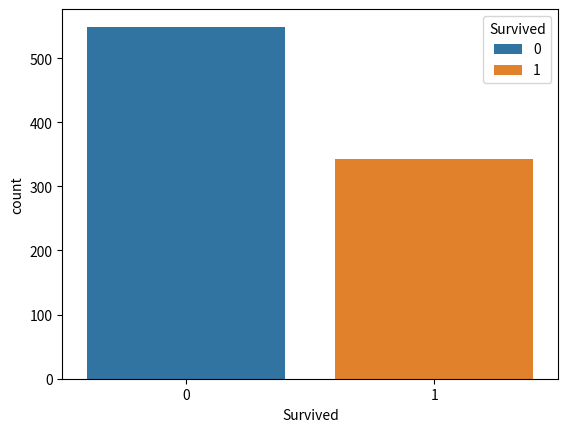

In [11]:
sns.countplot(x='Survived', hue='Survived', data=df)

# 觀察特徵與生存間的關係圖表

<Axes: xlabel='Pclass', ylabel='count'>

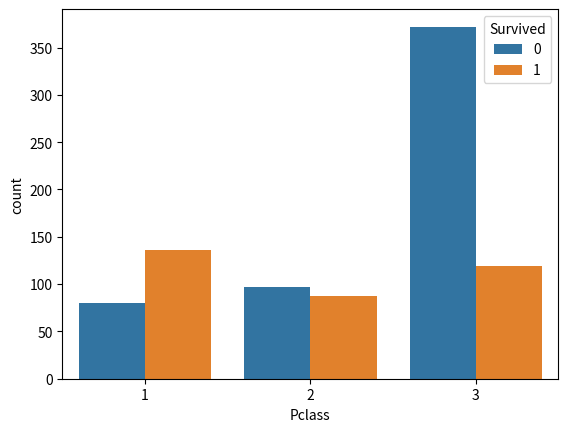

In [13]:
#存活和艙等的關係
sns.countplot(x='Pclass', hue='Survived', data=df)
#以比例來看，艙等三的存活比例低，艙等2次之，艙等1存活比例最高

<Axes: xlabel='Sex', ylabel='count'>

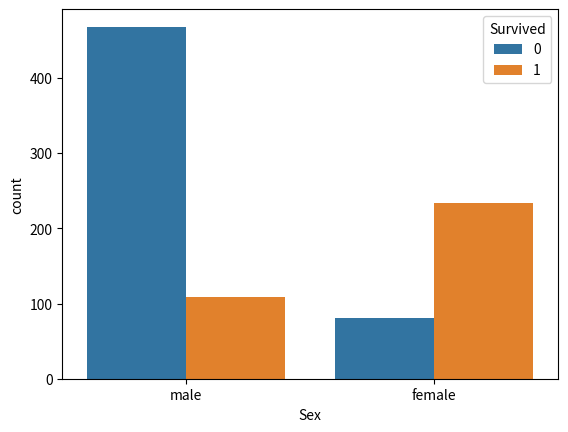

In [14]:
#存活和性別的關係
sns.countplot(x='Sex', hue='Survived', data=df)
#男性的存活比例偏低

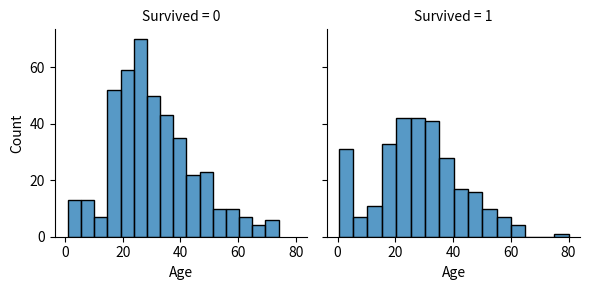

In [15]:
# 連續型用分布圖行來看
g = sns.FacetGrid(df, col='Survived')
g.map(sns.histplot, 'Age', kde=False)
plt.show()
#年紀小的存活率較高。年紀大的因為人少，看不出趨勢

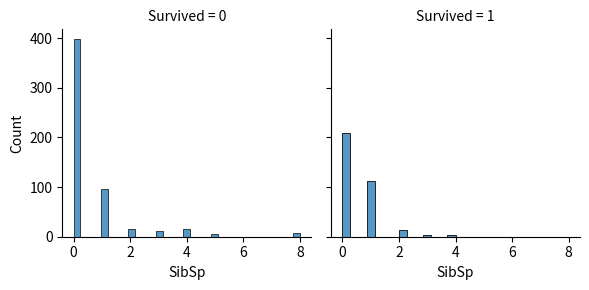

In [16]:
# 連續型用分布圖行來看
g = sns.FacetGrid(df, col='Survived')
g.map(sns.histplot, 'SibSp', kde=False)
plt.show()
#有兄弟姊妹的存活率較高

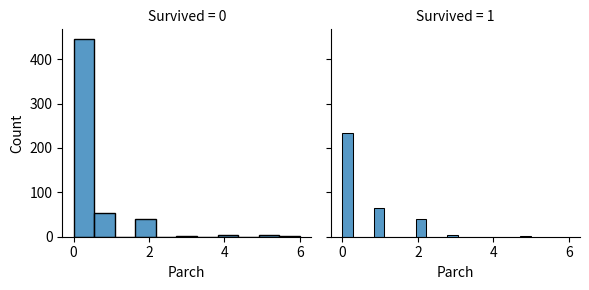

In [17]:
# 連續型用分布圖行來看
g = sns.FacetGrid(df, col='Survived')
g.map(sns.histplot, 'Parch', kde=False)
plt.show()
#有父母或子女的存活率較高

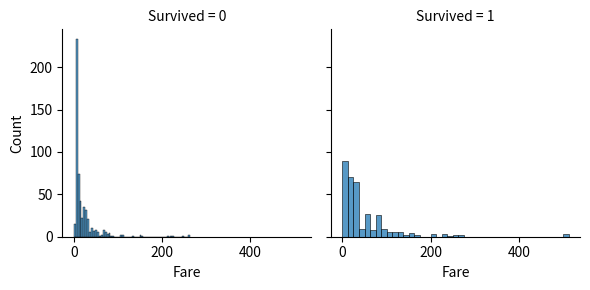

In [18]:
# 連續型用分布圖行來看
g = sns.FacetGrid(df, col='Survived')
g.map(sns.histplot, 'Fare', kde=False)
plt.show()
#票價低的存活比例偏低

<Axes: xlabel='Embarked', ylabel='count'>

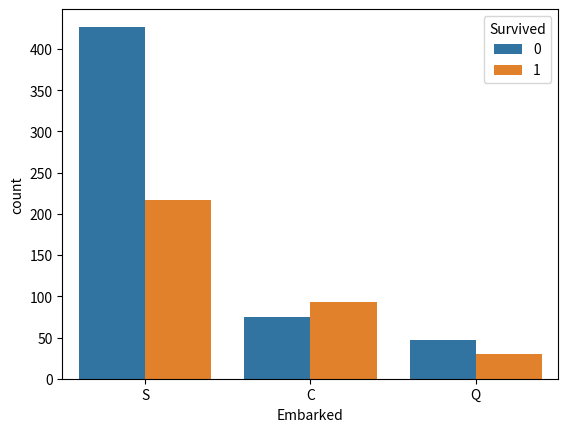

In [19]:
#存活和登船港口的關係
sns.countplot(x='Embarked', hue='Survived', data=df)
#登船港口，C的存活比例最高，Q次之，S最低
#S存活比例偏低

# 1️⃣ 數值欄位：用 Pearson 相關係數

In [20]:
from scipy.stats import pearsonr

df_valid = df[['Pclass', 'Survived']].dropna()

# corr, p = pearsonr(df_valid['Pclass'], df_valid['Survived'])
# print(f"Pclass vs Survived: corr = {corr:.3f}, p = {p:.3f}")

corr, _= pearsonr(df_valid['Pclass'], df_valid['Survived'])
print(f"Pclass vs Survived: corr = {corr:.3f}")

Pclass vs Survived: corr = -0.338


In [21]:
# 去除缺失值（dropna 對兩欄一起作用）
df_valid = df[['Age', 'Survived']].dropna()

# corr, p = pearsonr(df_valid['Age'], df_valid['Survived'])
# print(f"Age vs Survived: corr = {corr:.3f}, p = {p:.3f}")

corr, _= pearsonr(df_valid['Age'], df_valid['Survived'])
print(f"Age vs Survived: corr = {corr:.3f}")
#-0.077:非常弱的負相關（年齡越大，生存機率略低）

Age vs Survived: corr = -0.077


In [48]:
# Pclass dtypes: 是object,故沒有選用
# cols = ['Pclass','Age','SibSp','Parch','Fare', 'Survived']
cols = ['Age','SibSp','Parch','Fare', 'Survived']
print("===== 數值欄位 vs Survived 的相關係數 =====")
print(df[cols].corr(method='pearson')['Survived'].sort_values(ascending=False))

===== 數值欄位 vs Survived 的相關係數 =====
Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Name: Survived, dtype: float64


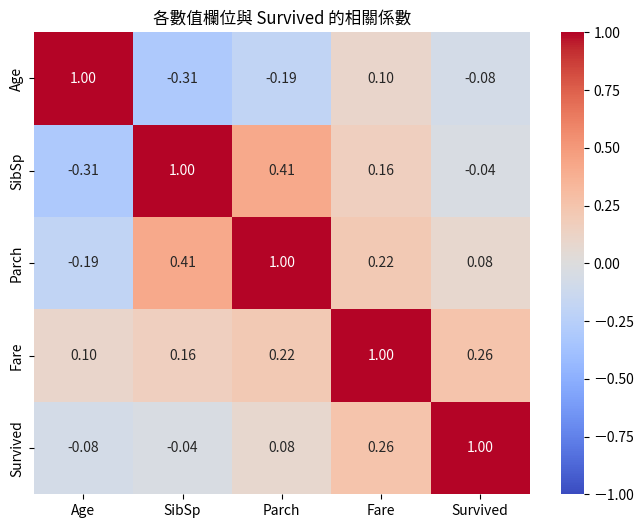

In [49]:
# 選擇數值欄位
# cols = ['Pclass','Age','SibSp','Parch','Fare', 'Survived']
cols = ['Age','SibSp','Parch','Fare', 'Survived']
corr_matrix = df[cols].corr(method='pearson')

# 畫熱力圖
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("各數值欄位與 Survived 的相關係數")
plt.show()


# 2️⃣ 類別欄位：比較每組平均生存率

In [24]:
for col in ['Pclass', 'Sex', 'Embarked']:
    print(df.groupby(col)['Survived'].mean())
    print()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64



## 推論性統計分析 ： 檢定「各組生存率的差異」是否達到統計顯著

檢定「各組生存率的差異」是否達到統計顯著
Eta Squared（η²）是一種衡量「變異量比例」的統計指標，用來表示自變數對因變數的影響力大小。

In [25]:
import pingouin as pg

# Sex 與 Survived 的關係
aov_pcl = pg.anova(dv='Survived', between='Pclass', data=df)
print("Pclass vs Survived ANOVA 結果：\n", aov_pcl)
print("==============================")

# Sex 與 Survived 的關係
aov_sex = pg.anova(dv='Survived', between='Sex', data=df)
print("Sex vs Survived ANOVA 結果：\n", aov_sex)
print("==============================")

# Embarked 與 Survived 的關係
aov_emb = pg.anova(dv='Survived', between='Embarked', data=df)
print("Embarked vs Survived ANOVA 結果：\n", aov_emb)

Pclass vs Survived ANOVA 結果：
    Source  ddof1  ddof2          F         p-unc       np2
0  Pclass      2    888  57.964818  2.183247e-24  0.115476
Sex vs Survived ANOVA 結果：
   Source  ddof1  ddof2           F         p-unc       np2
0    Sex      1    889  372.405724  1.406066e-69  0.295231
Embarked vs Survived ANOVA 結果：
      Source  ddof1  ddof2         F     p-unc       np2
0  Embarked      2    886  13.60527  0.000002  0.029797


In [26]:
def judgment_etaSq(etaSq):
    if etaSq < .01:
        qual = 'Negligible'
    elif etaSq < .06:
        qual = 'Small'
    elif etaSq < .14:
        qual = 'Medium'
    else:
        qual = 'Large'
    return(qual)

judgment_etaSq(aov_pcl.loc[0, 'np2'])

'Medium'

In [27]:
judgment_etaSq(aov_sex.loc[0, 'np2'])

'Large'

In [28]:
judgment_etaSq(aov_emb.loc[0, 'np2'])

'Small'

# 3️⃣ 所有欄位一次比：用機器學習的 feature_importance_

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# 欄位前處理：將類別轉成數字
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# 訓練模型
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
model = RandomForestClassifier()
model.fit(df_encoded[features].dropna(), df_encoded['Survived'].loc[df_encoded[features].dropna().index])

# # 顯示重要性
# importances = model.feature_importances_
# for f, i in zip(features, importances):
#     print(f"{f}: {i:.3f}")

# 排序後印出
sorted_idx = importances.argsort()[::-1]  # 從大到小排序
for idx in sorted_idx:
    print(f"{features[idx]}: {importances[idx]:.3f}")



Age: 0.277
Fare: 0.264
Sex: 0.252
Pclass: 0.097
SibSp: 0.046
Parch: 0.037
Embarked: 0.027


# Mutual Information

Sex         0.132963
Fare        0.129271
Pclass      0.096040
Age         0.038185
Embarked    0.025194
Parch       0.023082
SibSp       0.003338
dtype: float64


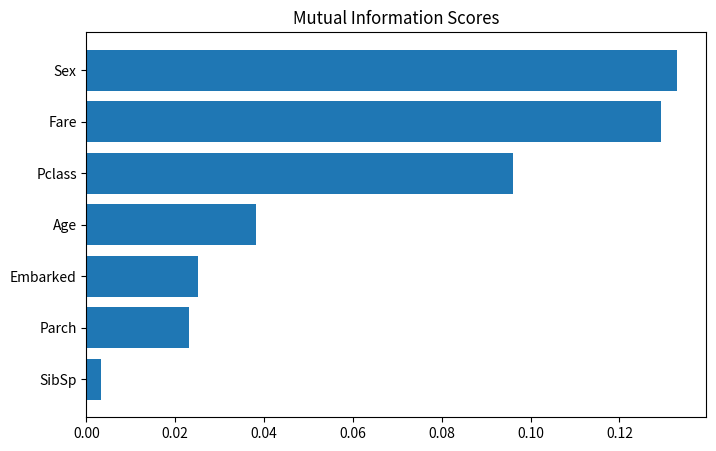

In [43]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

df_mi = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', "Survived"]].dropna()
X = df_mi.drop("Survived", axis=1)
y = df_mi["Survived"]

# Label encode 類別欄位
for col in X.select_dtypes("object"):
    X[col] = LabelEncoder().fit_transform(X[col])

mi = mutual_info_classif(X, y, discrete_features="auto")
mi_result = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_result)

# 繪圖
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_result)

#Sex, Fare, Pclass為前最相關欄位